# Problem 2 
### c) Verifying the calculations in (a-i) and (b-i)

In [406]:
from numpy.linalg import svd
from numpy.linalg import eig
from numpy import matrix

In [407]:
A = matrix([[2, 2], [-1, 1]])

In [408]:
A.T

matrix([[ 2, -1],
        [ 2,  1]])

In [409]:
A = matrix([[1, 1], 
     [1, 1], 
     [1, -1]])

In [410]:
print(A)

[[ 1  1]
 [ 1  1]
 [ 1 -1]]


In [411]:
U, sigma, Vt = svd(A)

In [412]:
print(U)

[[-7.07106781e-01 -2.22044605e-16 -7.07106781e-01]
 [-7.07106781e-01 -1.11022302e-16  7.07106781e-01]
 [-5.55111512e-17  1.00000000e+00 -2.25745422e-16]]


In [413]:
print(sigma)

[2.         1.41421356]


In [414]:
print(Vt)

[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]


In [415]:
eig(A @ A.T)

(array([4.0000000e+00, 4.4408921e-16, 2.0000000e+00]),
 matrix([[ 0.70710678, -0.70710678,  0.        ],
         [ 0.70710678,  0.70710678,  0.        ],
         [ 0.        ,  0.        ,  1.        ]]))

In [416]:
A.T

matrix([[ 1,  1,  1],
        [ 1,  1, -1]])

In [417]:
eig(A.T @ A)

(array([4., 2.]),
 matrix([[ 0.70710678, -0.70710678],
         [ 0.70710678,  0.70710678]]))

# Problem 4
### Libraries for all the problems

In [418]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
import warnings
warnings.filterwarnings("ignore")

In [419]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [420]:
df = df.drop(['id', 'date', 'zipcode'], axis = 1)

In [421]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [422]:
X = df.drop(['price'], axis = 1)
y = df['price']

In [423]:
model = LinearRegression()
model.fit(X, y)
model.coef_

array([-3.41516691e+04,  4.21617075e+04,  1.08722972e+02,  1.27416302e-01,
        7.60688060e+02,  5.87847215e+05,  4.94292277e+04,  3.10318017e+04,
        9.72193692e+04,  7.07908517e+01,  3.79321197e+01, -2.45627635e+03,
        2.15324371e+01,  5.61060482e+05, -1.17020859e+05,  2.74311971e+01,
       -3.93287863e-01])

In [424]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [425]:
pd.DataFrame(list(zip(X.columns, model.coef_)), columns = ['Features', 'Coefficients'])

,Features,Coefficients
0,bedrooms,-34151.669114
1,bathrooms,42161.707505
2,sqft_living,108.722972
3,sqft_lot,0.127416
4,floors,760.688060
5,waterfront,587847.215242
6,view,49429.227698
7,condition,31031.801737
8,grade,97219.369206
9,sqft_above,70.790852


In [426]:
## Problem 4 
## a) The table that explains the relationship between Features and the Coefficients according to the Linear Regression Model
##    is present above. The features that have a positive correlation with the price are bathrooms, sqft_living, sqft_lot, floors,
##    waterfront, view, condition, grade, sqft_above, sqft_basement, yr_renovated, lat, long, sqft_living15. 
##    The feature that has a very strong positive correlation with price is waterfront. It makes an intuitive sense as houses 
##    with waterfronts tend to be costlier than the other houses respectively. 

In [427]:
## b) Yes, we were able to find the features that have inverse relationship with the prices according to our linear regression model are bedrooms
##    yr_built and sqft_lot15 respectively. 

In [428]:
df_train = pd.read_csv('train.csv')

In [429]:
df_train.head()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,3,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,5,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [430]:
df_train = df_train.drop(['Unnamed: 0', 'zipcode'], axis = 1)

In [431]:
df_train.shape

(1000, 18)

In [432]:
model = LinearRegression()

In [433]:
X = df_train.drop(['price'], axis = 1)
y_actual = df_train['price']

In [434]:
X.shape

(1000, 17)

In [435]:
y_actual.shape

(1000,)

In [436]:
model.fit(X, y_actual)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [437]:
y_predict = model.predict(X)

In [438]:
model.coef_

array([-1.47042805e+04,  2.56877840e+04,  8.30842102e+01,  3.75929764e-01,
        1.55555810e+04,  7.15535170e+05,  6.30278980e+04,  1.88164028e+04,
        7.95346027e+04,  4.20104951e+01,  4.10737151e+01, -2.40066933e+03,
        4.36829418e+01,  5.53505032e+05, -7.42402712e+03,  6.80157923e+01,
       -5.15527568e-01])

In [439]:
MSE = mean_squared_error(y_actual, y_predict)
RMSE = math.sqrt(MSE)

In [440]:
print("The root mean squared error in our dataset for training data is: {}".format(RMSE))

The root mean squared error in our dataset for training data is: 177443.42133704163


In [441]:
print("The R square value in our dataset for training data is {}".format(r2_score(y_predict, y_actual)))

The R square value in our dataset for training data is 0.6236008473480462


In [442]:
## Problem 4
## c) The coefficients of linear regression for training data are
##    [-1.47042805e+04,  2.56877840e+04,  8.30842102e+01,  3.75929764e-01,
##     1.55555810e+04,  7.15535170e+05,  6.30278980e+04,  1.88164028e+04,
##     7.95346027e+04,  4.20104951e+01,  4.10737151e+01, -2.40066933e+03,
##     4.36829418e+01,  5.53505032e+05, -7.42402712e+03,  6.80157923e+01,
##     -5.15527568e-01]
##     The root mean squared error (RMSE) in our dataset for training data is 17444 approximately. 
##     The R squared value in our dataset for training data is 0.623 approximately. 

In [443]:
df_test = pd.read_csv('test.csv')

In [444]:
df_test.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1001,3131200640,20150427T000000,700000.0,4,2.00,1830,4590,2.0,0,...,8,1830,0,1908,0,98105,47.6593,-122.327,1650,4590
1,1002,984000710,20141022T000000,270000.0,3,2.00,1560,8853,1.0,0,...,7,1560,0,1967,0,98058,47.4312,-122.171,1610,8750
2,1003,4167300350,20140508T000000,258000.0,4,1.75,1730,8320,1.0,0,...,7,1230,500,1977,0,98023,47.3270,-122.361,1840,9800
3,1004,2826049282,20140614T000000,530000.0,3,2.50,1930,7214,2.0,0,...,8,1930,0,2005,0,98125,47.7191,-122.309,1930,7266
4,1005,8946750030,20141218T000000,245000.0,3,2.25,1422,3677,2.0,0,...,7,1422,0,2012,0,98092,47.3204,-122.178,1677,3677


In [445]:
df_test.drop(['date', 'Unnamed: 0', 'id', 'zipcode'], axis = 1, inplace = True)


In [446]:
X_test = df_test.drop(['price'], axis = 1)
y_actual_test = df_test['price']

In [447]:
y_predict_test = model.predict(X_test)

In [448]:
MSE = mean_squared_error(y_actual_test, y_predict_test)
RMSE = math.sqrt(MSE)

In [449]:
print("The root mean squared error in our dataset for testing data is: {}".format(RMSE))

The root mean squared error in our dataset for testing data is: 240058.6484708906


In [450]:
print("The R square value in our dataset for training data is {}".format(r2_score(y_actual_test, y_predict_test)))

The R square value in our dataset for training data is 0.6543560876120941


In [451]:
## Problem 4
## d) The root mean squared error in our dataset for testing data is 240058.64 approximately.
##    The R squared error in our dataset for testing data is 0.6543 approximately. 

In [452]:
## e) We could see that root mean square error for the training data is about 177443 
##    and the root mean square error for the testing data is about 240058 respectively.
##    We could see that the model is overfitting on the training data as there is a lot of difference
##    between the training data and the test data respectively. 
##    The features in our linear regression model that have positive relationship with the price are bathrooms, waterfront
##    and view respectively. 
##    The model error could be calculated by taking the difference root mean squared error on the training data
##    and the root mean squared error on the testing data which is 240058.64 - 177443 = 62615.64 respectively.

## Problem 5

In [523]:
df = pd.read_csv('Carseats.csv')

In [524]:
df.head()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [525]:
df = pd.get_dummies(df, columns = ['Urban', 'US'], drop_first = True)
df.rename(columns = {'Urban_Yes': 'Urban', 'US_Yes': 'US'}, inplace = True)


In [526]:
X = df[['Price', 'Advertising', 'Urban', 'US']]
y = df['Sales']

In [527]:
from sklearn.linear_model import LinearRegression
warnings.filterwarnings('ignore')

In [528]:
model = LinearRegression(fit_intercept = True)
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [529]:
model.coef_

array([-0.05461169,  0.12033344, -0.03878985,  0.05851378])

In [530]:
model.intercept_

13.011278201140055

## Calculating the Standard Error for Price and Advertising as they are quantitative features. 

In [531]:
from statistics import variance, mean
import math

## t-value for Price Predictor

In [532]:
df.head()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,1,1
1,2,11.22,111,48,16,260,83,Good,65,10,1,1
2,3,10.06,113,35,10,269,80,Medium,59,12,1,1
3,4,7.40,117,100,4,466,97,Medium,55,14,1,1
4,5,4.15,141,64,3,340,128,Bad,38,13,1,0


In [533]:
X = df[['Price']]
y = df['Sales']

In [534]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [535]:
import statsmodels.api as sm
new_variable = sm.add_constant(X)
estimate = sm.OLS(y, new_variable)
new_variable_2 = estimate.fit()
print(new_variable_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     98.25
Date:                Wed, 06 Oct 2021   Prob (F-statistic):           7.62e-21
Time:                        21:47:25   Log-Likelihood:                -938.23
No. Observations:                 400   AIC:                             1880.
Df Residuals:                     398   BIC:                             1888.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.6419      0.633     21.558      0.0

In [536]:
y_predictions = model.predict(X)

In [537]:
X.shape

(400, 1)

In [538]:
Residual_sum_of_squares = sum((y_predictions - y) ** 2)

In [539]:
Price_coefficient = model.coef_[0]

In [540]:
Price_mean = mean(X['Price'])
Price_mean

115.795

In [541]:
number_of_features = X.shape[0]
Residual_standard_error = math.sqrt(Residual_sum_of_squares / (number_of_features - 2))
Price_standard_error =  np.sqrt((Residual_standard_error ** 2/ sum((X['Price'] - Price_mean) ** 2)))
Price_t_value = Price_coefficient / Price_standard_error

In [542]:
print("The t-value for Price predictor: {}".format(Price_t_value))

The t-value for Price predictor: -9.911997178907441


## t-Value for Advertising Predictor

In [543]:
X = df[['Advertising']]
y = df['Sales']

In [544]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [545]:
import statsmodels.api as sm
new_variable = sm.add_constant(X)
estimate = sm.OLS(y, new_variable)
new_variable_2 = estimate.fit()
print(new_variable_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     31.17
Date:                Wed, 06 Oct 2021   Prob (F-statistic):           4.38e-08
Time:                        21:47:30   Log-Likelihood:                -967.27
No. Observations:                 400   AIC:                             1939.
Df Residuals:                     398   BIC:                             1947.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.7370      0.192     35.007      

In [546]:
y_predictions = model.predict(X)

In [547]:
Advertising_mean = mean(X['Advertising'])
Advertising_mean

6.635

In [548]:
Advertising_coefficient = model.coef_[0]

In [549]:
Residual_sum_of_squares = sum((y_predictions - y) ** 2)
Residual_standard_error = math.sqrt(Residual_sum_of_squares / (number_of_features - 2))
Advertising_standard_error = math.sqrt(Residual_standard_error ** 2/ sum((X['Advertising'] - Advertising_mean) ** 2))
Advertising_t_value = Advertising_coefficient / Advertising_standard_error

In [550]:
Advertising_t_value

5.583231385142151

In [551]:
print("The t-value for Advertising predictor: {}".format(Advertising_t_value))

The t-value for Advertising predictor: 5.583231385142151


## t-value for Urban Predictor

In [552]:
X = df[['Urban']]
y = df['Sales']
model = LinearRegression()
model.fit(X, y)
y_predictions = model.predict(X)

In [553]:
import statsmodels.api as sm
new_variable = sm.add_constant(X)
estimate = sm.OLS(y, new_variable)
new_variable_2 = estimate.fit()
print(new_variable_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.09465
Date:                Wed, 06 Oct 2021   Prob (F-statistic):              0.759
Time:                        21:47:36   Log-Likelihood:                -982.31
No. Observations:                 400   AIC:                             1969.
Df Residuals:                     398   BIC:                             1977.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5636      0.260     29.060      0.0

In [554]:
Urban_coefficient = model.coef_[0]

In [555]:
Urban_mean = mean(X['Urban'])
Urban_mean

0.705

In [556]:
Residual_sum_of_squares = sum((y_predictions - y) ** 2)
Residual_standard_error = math.sqrt(Residual_sum_of_squares / (number_of_features - 2))
Urban_standard_error = math.sqrt(Residual_standard_error ** 2/ sum((X['Urban'] - Urban_mean) ** 2))
Urban_t_value = Urban_coefficient / Urban_standard_error

In [557]:
print("The t-value for Urban predictor: {}".format(Urban_t_value))

The t-value for Urban predictor: -0.30765346670661187


## t-value for US Predictor

In [488]:
X = df[['US']]
y = df['Sales']
model = LinearRegression()
model.fit(X, y)
y_predictions = model.predict(X)

In [489]:
import statsmodels.api as sm
new_variable = sm.add_constant(X)
estimate = sm.OLS(y, new_variable)
new_variable_2 = estimate.fit()
print(new_variable_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     12.89
Date:                Wed, 06 Oct 2021   Prob (F-statistic):           0.000372
Time:                        21:23:44   Log-Likelihood:                -975.98
No. Observations:                 400   AIC:                             1956.
Df Residuals:                     398   BIC:                             1964.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8230      0.234     29.215      0.0

In [490]:
US_coefficient = model.coef_[0]

In [491]:
US_mean = mean(X['US'])
US_mean

0.645

In [492]:
Residual_sum_of_squares = sum((y_predictions - y) ** 2)
Residual_standard_error = math.sqrt(Residual_sum_of_squares / (number_of_features - 2))
US_standard_error = math.sqrt(Residual_standard_error ** 2/ sum((X['US'] - US_mean) ** 2))
US_t_value = US_coefficient / US_standard_error

In [493]:
print("The t-value for US predictor: {}".format(US_t_value))

The t-value for US predictor: 3.589738747802489


In [582]:
X = df[['Advertising', 'Price']]
y = df['Sales']
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [583]:
y_predictions = model.predict(X)

In [584]:
MSE = mean_squared_error(y, y_predictions)
RMSE = math.sqrt(MSE)
print("The Root Mean Squared Error for the model is: {}".format(RMSE))

The Root Mean Squared Error for the model is: 2.3902576967831513


## Confidence intervals

In [585]:
## Based on the results above, we have to reject the null hypothesis for predictors Advertising, US, and Price
## We have to accept the null hypothesis for the predictor Advertising i.e. there is no relationship between advertising
## and sales. 

Price_confidence_range = [Price_coefficient - 2 * Price_standard_error, Price_coefficient + 2 * Price_standard_error]
Advertising_confidence_range = [Advertising_coefficient - 2 * Advertising_standard_error, Advertising_coefficient + 2 * Advertising_standard_error]
US_confidence_range = [US_coefficient - 2 * US_standard_error, US_coefficient + 2 * US_standard_error]

In [587]:
print("The confidence interval for Price predictor is: {}".format(Price_confidence_range))
print("The confidence interval for Advertising predictor is: {}".format(Advertising_confidence_range))

The confidence interval for Price predictor is: [-0.06378186304870437, -0.04236417394392761]
The confidence interval for Advertising predictor is: [0.0734506904739179, 0.15544449168751612]


## Predictions

In [499]:
y_predictions = model.predict(X)

In [500]:
MSE = mean_squared_error(y, y_predictions)
RMSE = math.sqrt(MSE)
print("The Root Mean Squared Error for the model is: {}".format(RMSE))

The Root Mean Squared Error for the model is: 2.3901741554417986


In [501]:
## Considering only the features based on our t-test
X_important_features = df[['Price', 'Urban', 'US']]
y = df['Sales']

In [502]:
model = LinearRegression(fit_intercept = True)
model.fit(X_important_features, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [503]:
y_predictions = model.predict(X_important_features)

In [504]:
MSE = mean_squared_error(y, y_predictions)
RMSE = math.sqrt(MSE)
print("The Root Mean Squared Error for the model is: {}".format(RMSE))

The Root Mean Squared Error for the model is: 2.4600989164099034


In [505]:
##Problem 5

## a. Fit a multiple regression model to predict Sales using Price, Advertising, Urban, and US.

## Ans. Answer in the above cells. 

## b. Provide an interpretation of each coefficient in the model. Be careful - some of the variables in the model are qualitative!

## Ans. Based on the outcomes from the coefficients, we see that Advertising and Sales have positive outcomes.
## That is, with the increase in the advertisements, there would be an increase in sales
## according to our linear regression model. We can also see from the above that with the increase in the prices of cars,
## there is a lower possibility of sales of the cars respectively. Some of the variables are qualitative such as Urban
## and US. 

## c. Write out the modle in equation form, being careful to handle the qualitative variables properly. 

## Ans. The equation that could be written is as follows. 
## Y = 13.0112 - 0.0546 * X1 + 0.1203 * X2 - 0.0387 * X3 + 0.058 * X4 which is based on the above coefficients. 

## d. For which of the predictions can you reject the null hypothesis? 

## Ans. We chose the significance level to be 0.01 which is mostly used. Based on the results above, we see that if 
## the t-value <= 2.364, we accept the NULL hypothesis and if t-value > 2.364, we reject the null hypothesis. From the 
## results above, we can conclude that we should be taking only the features Price, Urban and US. The feature that do
## not have any relationship between sales, according to our test, is Advertising respectively. 

## e. On the basis of your response to the previous question, fit a smaller model 
## that only uses the predictors for which there is evidence of association with the outcome.

## Ans. Answer in the notebook. 

## f. How well do the model in (a) and (e) fit the data?

## Ans. The first model with 4 features was able to fit the data well as compared to the second model that contained only 
## 3 features. However, the difference was not that significant as there seeems to be a small change in error when we are trying
## to fit fewer features to our linear regression model. We performed the t-tests and found the ones that have relationship
## with the output and rejected others that don't have a really strong relationship. This resulted in (e) model performing
## almost identical to the (a) model respectively. 

# Question 6



In [506]:
x = np.random.normal(0, 1, (200))
y = x + 2 * x**2 - 2 * x**3 + np.random.normal(0, 1, (200))

## Problem 6 
## a) In the problem, the value of n = 200 and the value of p = 1
##    The model that was used is multiple linear regression model. 

a) The model that was used in the process of prediction of the y variable is multiple linear regression

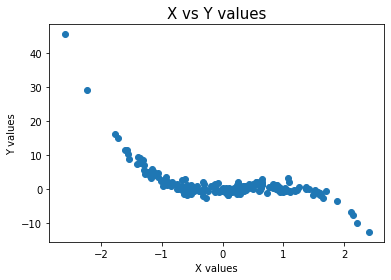

In [507]:
plt.scatter(x, y)

plt.xlabel('X values')
plt.ylabel('Y values')
plt.title('X vs Y values', fontsize = 15)
plt.show()

## Problem 6
## b) the scatterplot is plotted below between the X values and the Y values respectively. Title, x label and y label 
##    are also written to get a good understanding of the data.
##    In the below cell, we see that there seems to be a linearity from the X values between the range -1 and 1 respectively. 
##    However, the curve actually moves from linearity to non-linearity 
##    with the increase or the decrease of the values of X respectively. 

# c) Performing operations with seed value = 123

In [508]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
np.random.seed(123)

In [509]:
X = np.random.normal(0, 1, (200))
y = X + 2 * X**2 - 2 * X**3 + np.random.normal(0, 1, (200))
X = X.reshape(-1, 1)
y = y.reshape(-1, 1) 

In [510]:
poly_model = PolynomialFeatures(degree = 1)
X_poly_features = poly_model.fit_transform(X)
LOO = LeaveOneOut()
model = LinearRegression()
cross_validation_error = cross_val_score(estimator = model, X = X_poly_features, y = y, cv = LOO, scoring = 'neg_mean_squared_error').mean()
print("The Average Cross Validation Error using Leave One Out Cross Validation is: {}".format(cross_validation_error))

The Average Cross Validation Error using Leave One Out Cross Validation is: -54.44031803203236


In [511]:
poly_model = PolynomialFeatures(degree = 2)
X_poly_features = poly_model.fit_transform(X)
LOO = LeaveOneOut()
model = LinearRegression()
cross_validation_error = cross_val_score(estimator = model, X = X_poly_features, y = y, cv = LOO, scoring = 'neg_mean_squared_error').mean()
print("The Average Cross Validation Error using Leave One Out Cross Validation is: {}".format(cross_validation_error))

The Average Cross Validation Error using Leave One Out Cross Validation is: -31.501700134871612


In [512]:
poly_model = PolynomialFeatures(degree = 3)
X_poly_features = poly_model.fit_transform(X)
LOO = LeaveOneOut()
model = LinearRegression()
cross_validation_error = cross_val_score(estimator = model, X = X_poly_features, y = y, cv = LOO, scoring = 'neg_mean_squared_error').mean()
print("The Average Cross Validation Error using Leave One Out Cross Validation is: {}".format(cross_validation_error))

The Average Cross Validation Error using Leave One Out Cross Validation is: -0.8730559711228897


In [513]:
poly_model = PolynomialFeatures(degree = 4)
X_poly_features = poly_model.fit_transform(X)
LOO = LeaveOneOut()
model = LinearRegression()
model.fit(X_poly_features, y)
cross_validation_error = cross_val_score(estimator = model, X = X_poly_features, y = y, cv = LOO, scoring = 'neg_mean_squared_error').mean()
print("The Average Cross Validation Error using Leave One Out Cross Validation is: {}".format(cross_validation_error))

The Average Cross Validation Error using Leave One Out Cross Validation is: -0.8810894543450098


In [514]:
poly_model = PolynomialFeatures(degree = 5)
X_poly_features = poly_model.fit_transform(X)
LOO = LeaveOneOut()
model = LinearRegression()
model.fit(X_poly_features, y)
cross_validation_error = cross_val_score(estimator = model, X = X_poly_features, y = y, cv = LOO, scoring = 'neg_mean_squared_error').mean()
print("The Average Cross Validation Error using Leave One Out Cross Validation is: {}".format(cross_validation_error))

The Average Cross Validation Error using Leave One Out Cross Validation is: -0.89823160528769


# d) Performing the same operations with different seed value 12345

In [515]:
np.random.seed(12345)

In [516]:
X = np.random.normal(0, 1, (200))
y = X + 2 * X**2 - 2 * X**3 + np.random.normal(0, 1, (200))
X = X.reshape(-1, 1)
y = y.reshape(-1, 1) 

In [517]:
poly_model = PolynomialFeatures(degree = 1)
X_poly_features = poly_model.fit_transform(X)
LOO = LeaveOneOut()
model = LinearRegression()
cross_validation_error = cross_val_score(estimator = model, X = X_poly_features, y = y, cv = LOO, scoring = 'neg_mean_squared_error').mean()
print("The Average Cross Validation Error using Leave One Out Cross Validation is: {}".format(cross_validation_error))

The Average Cross Validation Error using Leave One Out Cross Validation is: -26.534996047663075


In [518]:
poly_model = PolynomialFeatures(degree = 2)
X_poly_features = poly_model.fit_transform(X)
LOO = LeaveOneOut()
model = LinearRegression()
cross_validation_error = cross_val_score(estimator = model, X = X_poly_features, y = y, cv = LOO, scoring = 'neg_mean_squared_error').mean()
print("The Average Cross Validation Error using Leave One Out Cross Validation is: {}".format(cross_validation_error))

The Average Cross Validation Error using Leave One Out Cross Validation is: -32.53855587022528


In [519]:
poly_model = PolynomialFeatures(degree = 3)
X_poly_features = poly_model.fit_transform(X)
LOO = LeaveOneOut()
model = LinearRegression()
cross_validation_error = cross_val_score(estimator = model, X = X_poly_features, y = y, cv = LOO, scoring = 'neg_mean_squared_error').mean()
print("The Average Cross Validation Error using Leave One Out Cross Validation is: {}".format(cross_validation_error))

The Average Cross Validation Error using Leave One Out Cross Validation is: -1.1079418003348265


In [520]:
poly_model = PolynomialFeatures(degree = 4)
X_poly_features = poly_model.fit_transform(X)
LOO = LeaveOneOut()
model = LinearRegression()
cross_validation_error = cross_val_score(estimator = model, X = X_poly_features, y = y, cv = LOO, scoring = 'neg_mean_squared_error').mean()
print("The Average Cross Validation Error using Leave One Out Cross Validation is: {}".format(cross_validation_error))

The Average Cross Validation Error using Leave One Out Cross Validation is: -1.3234306760123509


In [521]:
poly_model = PolynomialFeatures(degree = 5)
X_poly_features = poly_model.fit_transform(X)
LOO = LeaveOneOut()
model = LinearRegression()
cross_validation_error = cross_val_score(estimator = model, X = X_poly_features, y = y, cv = LOO, scoring = 'neg_mean_squared_error').mean()
print("The Average Cross Validation Error using Leave One Out Cross Validation is: {}".format(cross_validation_error))

The Average Cross Validation Error using Leave One Out Cross Validation is: -1.1099273761939097
